In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import seaborn as sns
from esn_lib.esn import *
from esn_lib.hubesn import *
from esn_tasks.mackey_glass.mackey import *
import numpy as np
from esn_tasks.mnist.mnist_28 import *
from esn_tasks.narma10.narma10 import *
np.random.seed(0)  # 设置随机种子为0

In [3]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 10,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'exp_coef': 2,
}
task_pm = {
    'n_train': 10,
    'n_test': 10,
}
hubesn = ESN(**params)
hubesn.fit(mnist.X_train, mnist.y_train)
y_pred, _ = hubesn.predict(mnist.X_test)
print(mnist.eval(y_pred, mnist.y_test))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 28)

In [28]:
np.random.seed(0)  # 固定随机数种子为 0
u = np.random.uniform(0, 0.5, 100)[0:5]
u

array([0.27440675, 0.35759468, 0.30138169, 0.27244159, 0.2118274 ])

In [31]:
k = np.random.uniform(0, 0.5, 100)[0:5]
k

array([0.45327775, 0.38702367, 0.16657258, 0.04055069, 0.20362059])

In [ ]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'exp_coef': 2,
}
task_pm = {
    'n_train': 1000,
    'n_test': 1000,
}
params['lambda_dc']= 0.7
params['lambda_sc'] = 0.6
# task = MackeyGlass(**task_pm)
# task = MNIST28(**task_pm)
task = NARMA10(**task_pm)
for _ in range(10) :
    esn = ESN(**params)
    hubesn = HubESN(**params)
    
    esn.fit(task.X_train, task.y_train)
    hubesn.fit(task.X_train, task.y_train)
    
    y_pred_esn, _ = esn.predict(task.X_test)
    y_pred_hubesn, _ = hubesn.predict(task.X_test)

    rmse_esn = task.rmse(y_pred_esn, task.y_test)
    rmse_hubesn = task.rmse(y_pred_hubesn, task.y_test)
    print("{:.2f},{:.2f}".format(rmse_esn,rmse_hubesn))

0.14,0.19
0.14,0.19
0.14,0.19
0.14,0.19


In [2]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'exp_coef': 2,
}
all_rmse_esn, all_rmse_hubesn = [], []
# 全局效率
all_eff_esn, all_eff_hubesn = [], []
# 平均最短路径
all_l_esn, all_l_hubesn = [], []
# 聚类系数
all_coef_esn, all_coef_hubesn = [], []
task_pm = {
            'n_train': 1000,
            'n_test': 1000,
        }
# task = MackeyGlass(**task_pm)
task = NARMA10(**task_pm)
for dc in [0.5,0.6,0.7,0.8,0.9]:
    for sc in [0.5,0.6,0.7,0.8,0.9]:
        params['lambda_dc']= dc
        params['lambda_sc'] = sc
        
        esn = ESN(**params)
        hubesn = HubESN(**params)

        esn.fit(task.X_train, task.y_train)
        hubesn.fit(task.X_train, task.y_train)

        y_pred_esn, _ = esn.predict(task.X_test)
        y_pred_hubesn, _ = hubesn.predict(task.X_test)

        rmse_esn = task.rmse(y_pred_esn, task.y_test)
        rmse_hubesn = task.rmse(y_pred_hubesn, task.y_test)
        
        l_esn, eff_esn,_,_,_ = esn.global_efficiency()
        l_hubesn, eff_hubesn,_,_,_ = hubesn.global_efficiency()
        
        coef_esn= esn.get_clustering_coefficient()
        coef_hubesn = hubesn.get_clustering_coefficient()

        all_rmse_esn.append(rmse_esn)
        all_rmse_hubesn.append(rmse_hubesn)
        
        all_l_esn.append(l_esn)
        all_l_hubesn.append(l_hubesn)
    
        all_eff_esn.append(eff_esn)
        all_eff_hubesn.append(eff_hubesn)
    
        all_coef_esn.append(coef_esn)
        all_coef_hubesn.append(coef_hubesn)
        print(f'{dc},{sc},ESN_RMSE={rmse_esn},HubESN_RMSE={rmse_hubesn}')
   

0.5,0.5,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.15189079755942084
0.5,0.6,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.15483152985767715
0.5,0.7,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.1627667083370051
0.5,0.8,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.13746514032791368
0.5,0.9,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.1367932997623391
0.6,0.5,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.13661252976594665
0.6,0.6,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.15189079755942084
0.6,0.7,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.15945564816329433
0.6,0.8,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.12838072636381492
0.6,0.9,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.15082273908283184
0.7,0.5,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.1681961946498053
0.7,0.6,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.18583689343012244
0.7,0.7,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.15189079755942084
0.7,0.8,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.14338431239921065
0.7,0.9,ESN_RMSE=0.1448345378577967,HubESN_RMSE=0.1

In [3]:
import pandas as pd
rmse_df = pd.DataFrame({'ESN': all_rmse_esn, 'HubESN': all_rmse_hubesn})
l_df = pd.DataFrame({'ESN': all_l_esn, 'HubESN': all_l_hubesn})
eff_df = pd.DataFrame({'ESN': all_eff_esn, 'HubESN': all_eff_hubesn})
coef_df = pd.DataFrame({'ESN': all_coef_esn, 'HubESN': all_coef_hubesn})

rmse_df.to_csv('../plot_data/调参/rmse.csv',index=False)
l_df.to_csv('../plot_data/调参/average_shortest_path.csv',index=False)
eff_df.to_csv('../plot_data/调参/global_efficiency.csv',index=False)
coef_df.to_csv('../plot_data/调参/clustering_coefficient.csv',index=False)

In [5]:
rmse_df

,ESN,HubESN
0,0.008987,0.003372
1,0.005844,0.003740
2,0.009578,0.002829
3,0.006244,0.003905
4,0.005933,0.005675
5,0.010250,0.003485
6,0.006387,0.004132
7,0.005564,0.003876
8,0.003989,0.002243
9,0.010449,0.003383


In [4]:
parameters = []
for dc in [0.5,0.6,0.7,0.8,0.9]:
    for sc in [0.5,0.6,0.7,0.8,0.9]:
        parameters.append(f"{dc}_{sc}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


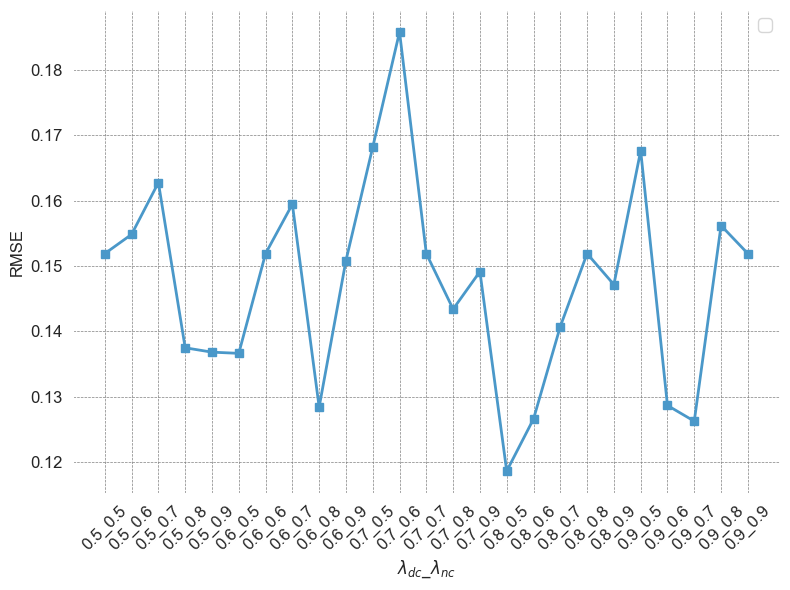

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


parameters = []
for dc in [0.5,0.6,0.7,0.8,0.9]:
    for sc in [0.5,0.6,0.7,0.8,0.9]:
        parameters.append(f"{dc}_{sc}")
# 假设的参数和数据
df = pd.read_csv('../plot_data/调参/rmse.csv')
# 数据
ESN_RMSE = df['ESN']
HubESN_RMSE = df['HubESN']

# 绘制折线图
plt.figure(figsize=(8, 6))  # 设置图像大小
# plt.plot(parameters, ESN_RMSE, marker='o', color='blue', label='ESN', linewidth=2)
plt.plot(parameters[:len(HubESN_RMSE)], HubESN_RMSE, marker='s', color='#4A98C9', linewidth=2)

# 设置图表标题和坐标轴标签
# plt.title('RMSE ESN VS HubESN', fontsize=14)
plt.xlabel('$\lambda _{dc}\_\lambda _{nc}$', fontsize=12)


# 显示图例，并设置图例背景和字体大小
plt.legend(loc='upper right', fontsize=12, facecolor='white', frameon=True, framealpha=0.8)

# 显示网格线，设置颜色和样式
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 横轴标签倾斜显示
plt.xticks(rotation=45)

# 设置背景颜色为白色
plt.gca().set_facecolor('white')

# 设置横纵坐标字体大小
plt.tick_params(axis='both', which='major', labelsize=12)

plt.ylabel('RMSE', fontsize=12)
plt.tight_layout()
# 保存并显示图像
plt.savefig('../plots/调参/RMSE比较2.png', dpi=300)

plt.show()


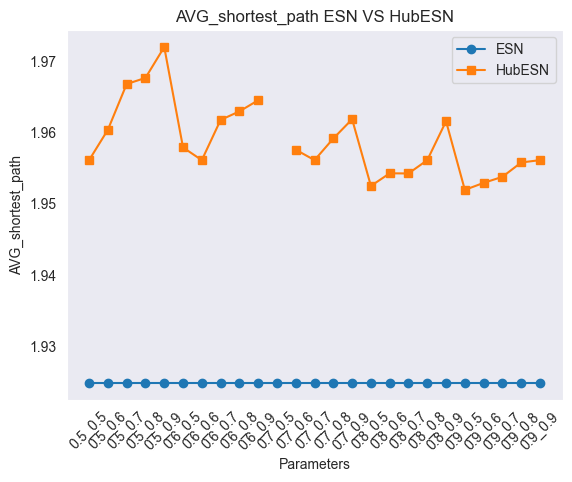

In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv('../plot_data/调参/average_shortest_path.csv')
# 数据
ESN_RMSE = df['ESN']
HubESN_RMSE = df['HubESN']

# 绘制折线图
plt.plot(parameters, ESN_RMSE, marker='o', label='ESN')
plt.plot(parameters[:len(HubESN_RMSE)], HubESN_RMSE, marker='s', label='HubESN')

# 设置图表标题和坐标轴标签
plt.title('AVG_shortest_path ESN VS HubESN')
plt.xlabel('Parameters')
plt.ylabel('AVG_shortest_path')

# 显示图例
plt.legend()

# 显示网格线
plt.grid()
# 横轴标签倾斜显示
plt.xticks(rotation=45)
# 保存并显示图像
plt.savefig('../plot_data/调参/img/average_shortest_path.png', dpi=300)
plt.show()

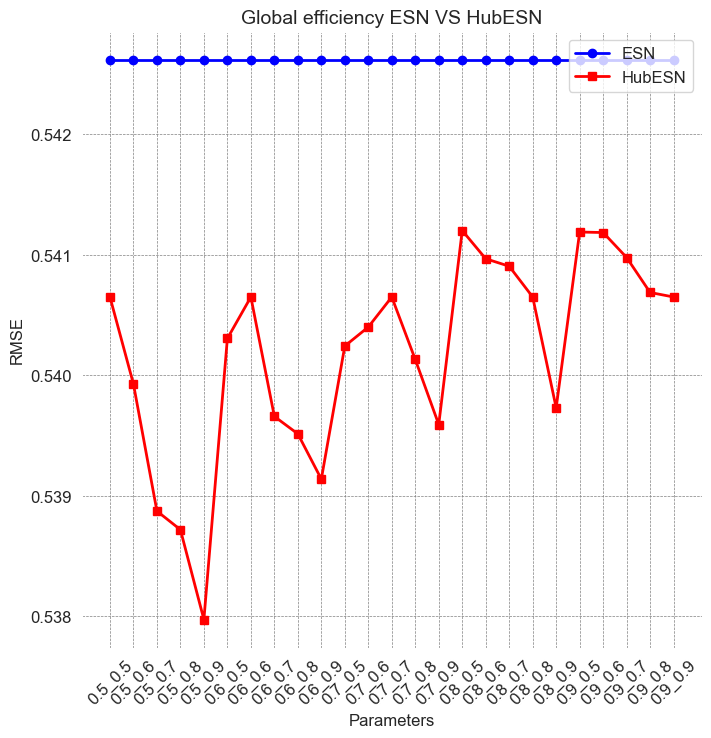

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


parameters = []
for dc in [0.5,0.6,0.7,0.8,0.9]:
    for sc in [0.5,0.6,0.7,0.8,0.9]:
        parameters.append(f"{dc}_{sc}")
# 假设的参数和数据
df = pd.read_csv('../plot_data/调参/global_efficiency.csv')
# 数据
ESN_RMSE = df['ESN']
HubESN_RMSE = df['HubESN']

# 绘制折线图
plt.figure(figsize=(8, 8))  # 设置图像大小
plt.plot(parameters, ESN_RMSE, marker='o', color='blue', label='ESN', linewidth=2)
plt.plot(parameters[:len(HubESN_RMSE)], HubESN_RMSE, marker='s', color='red', label='HubESN', linewidth=2)

# 设置图表标题和坐标轴标签
plt.title('Global efficiency ESN VS HubESN', fontsize=14)
plt.xlabel('Parameters', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# 显示图例，并设置图例背景和字体大小
plt.legend(loc='upper right', fontsize=12, facecolor='white', frameon=True, framealpha=0.8)

# 显示网格线，设置颜色和样式
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 横轴标签倾斜显示
plt.xticks(rotation=45)

# 设置背景颜色为白色
plt.gca().set_facecolor('white')

# 设置横纵坐标字体大小
plt.tick_params(axis='both', which='major', labelsize=12)

# 保存并显示图像
plt.savefig('../plots/调参/全局效率.png', dpi=300)
plt.show()
